### Anomaly Detection

Students: **Чича Олександр та Мельничук Павло**

Mentor: **Anna Mandrenko, Yevhenii Kubiuk**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
path = "ambient_temperature_system_failure.csv"
data_frame = pd.read_csv(path)
data_frame

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [16]:
data_frame.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


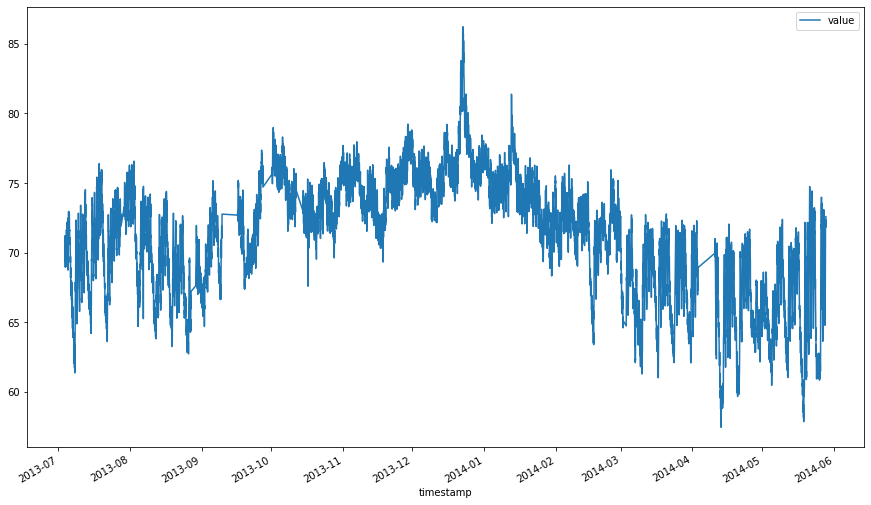

In [9]:
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'])
data_frame.plot(x='timestamp', figsize=(15, 9))

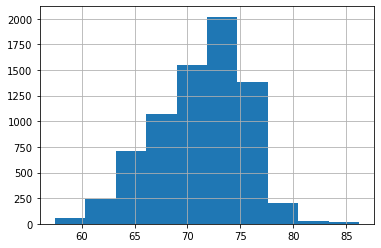

In [14]:
data_frame['value'].hist()

In [35]:
data_frame['hour'] = data_frame['timestamp'].dt.hour

daylight_list = []
for i in data_frame['hour']:
    if i>=0 and i<12:
        daylight_list.append('am')
    else :
        daylight_list.append('pm')
data_frame["daylight"] = daylight_list

data_frame["day of week"] = data_frame['timestamp'].dt.weekday

data_frame["is weekend"] = data_frame["day of week"]>4

data_frame["day of the year"] = data_frame['timestamp'].dt.dayofyear

data_frame["year"] = data_frame['timestamp'].dt.year

data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
0,2013-07-04 00:00:00,69.880835,0,am,3,False,185,2013
1,2013-07-04 01:00:00,71.220227,1,am,3,False,185,2013
2,2013-07-04 02:00:00,70.877805,2,am,3,False,185,2013
3,2013-07-04 03:00:00,68.959400,3,am,3,False,185,2013
4,2013-07-04 04:00:00,69.283551,4,am,3,False,185,2013
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,am,2,False,148,2014
7263,2014-05-28 12:00:00,72.172956,12,pm,2,False,148,2014
7264,2014-05-28 13:00:00,72.046565,13,pm,2,False,148,2014
7265,2014-05-28 14:00:00,71.825226,14,pm,2,False,148,2014
